# Using Mapper - first time 

In [105]:
import numpy as np
import pandas as pd
import mapper
import matplotlib.pyplot as plt

df = pd.read_csv("/home/jarvis/Documents/Git/TDA-NBA/Data/DataGugao.csv")
Pos = pd.read_csv("/home/jarvis/Documents/Git/TDA-NBA/Data/PosGugao.csv")
#df = pd.read_csv("/home/jarvis/Documents/Git/TDA-NBA/Data/NBA-preprocessed-data.csv")
#data = np.loadtxt(inputfile, delimiter=',', dtype=np.float)
df.head()


,Unnamed: 0,MIN,PTS,FGM,FGA,FTM,FTA,REB,AST,STL,BLK,PF
0,0,16.057971,0.443141,0.169675,0.423285,0.044224,0.057762,0.091155,0.162455,0.027076,0.009025,0.119134
1,1,23.884615,0.385937,0.147075,0.310789,0.069243,0.103596,0.272142,0.068706,0.031669,0.029522,0.082126
2,2,4.428571,0.193548,0.053763,0.204301,0.053763,0.129032,0.161290,0.021505,0.064516,0.000000,0.107527
3,3,9.346154,0.271605,0.109053,0.298354,0.034979,0.053498,0.228395,0.059671,0.032922,0.022634,0.158436
4,4,32.085366,0.474724,0.201064,0.398328,0.039149,0.049031,0.226530,0.099962,0.025846,0.045990,0.061954


## Processing the data

In [36]:
type({'metric': 'euclidean'})

dict

# Mapper

### Input

In [128]:
'''
    Step 1: Input
'''

data = df.as_matrix(); 
data = data.astype(float)

#Pos = Pos['0'].as_matrix()

# Preprocessing
point_labels = None
mask = None

#Gauss_density = mapper.filters.Gauss_density
#kNN_distance  = mapper.filters.kNN_distance
#crop = mapper.crop

#data, point_labels = mapper.mask_data(data, mask, point_labels)
a = [100 for x in Pos]
a

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100

Number of CPU cores present: 1
Mapper: Filter range in dimension 0: [0.00, 0.00]
Mapper: Cover: Balanced cover with 15 intervals and 30.0% overlap.
Mapper: Clustering: Average linkage clustering
Mapper: Cutoff: None
Level: (0,)
Level: (1,)
Level: (2,)
Level: (3,)
Level: (4,)
Level: (5,)
Level: (6,)
Level: (7,)
Level: (8,)Start Mapper thread.
Filter level (0,) has 44 points.
Level: (9,)
Filter level (1,) has 44 points.
Level: (10,)
Filter level (2,) has 44 points.
Level: (11,)
Level: (12,)
Filter level (3,) has 45 points.
Level: (13,)

Filter level (4,) has 44 points.Level: (14,)

Filter level (5,) has 44 points.
Filter level (6,) has 44 points.
Filter level (7,) has 44 points.
Filter level (8,) has 44 points.
Filter level (9,) has 44 points.
Filter level (10,) has 44 points.
Filter level (11,) has 45 points.
Filter level (12,) has 44 points.
Filter level (13,) has 44 points.
Filter level (14,) has 44 points.
Scale graph path: [5 5 4 9 6 5 4 5 5 7 5 4 7 4 5]
There are 80 nodes.
Generate

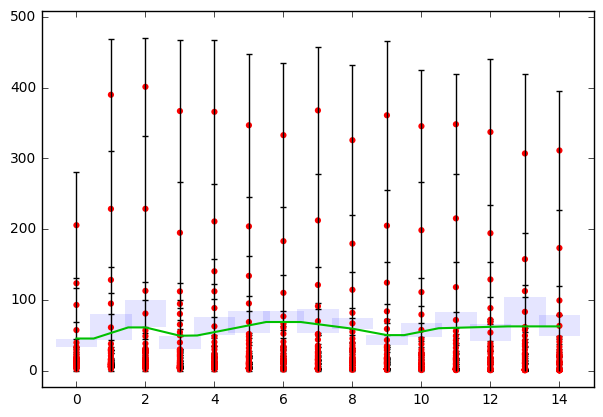

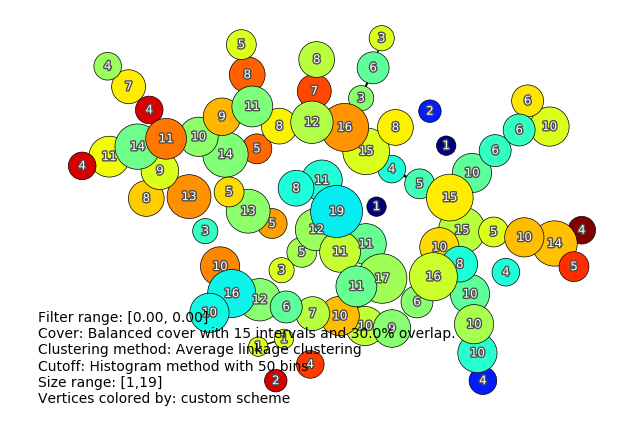

In [130]:
'''Step 2: Metric'''
metricpar = {'metric': 'euclidean'}#minkowski,euclidean,chebychev

'''Step 3: Filter'''
f = mapper.filters.Gauss_density(data,
                                 metricpar=metricpar,
                                 sigma=.5)

'''Step 4: Mapper parameters'''
#cover
cover = mapper.cover.balanced_cover_1d(intervals=15, overlap=30)

#cluster # Maybe to join different covers
cluster = mapper.average_linkage()

if not is_vector_data:
    metricpar = {}
#mapper 
mapper_output = mapper.mapper(data, f,
                              cover=cover,
                              cluster=cluster,
                              point_labels=point_labels,
                              cutoff=None,
                              metricpar=metricpar)

#delta
#cutoff = mapper.cutoff.first_gap(gap=0.07)
cutoff = mapper.cutoff.histogram(num_bins=50)
mapper_output.cutoff(cutoff, f, cover=cover, simple=False)

mapper_output.draw_scale_graph()
plt.savefig('scale_graph2.pdf')
'''
    Step 5: Display parameters
'''
# Node coloring

nodes = mapper_output.nodes
node_color = None
name = 'custom scheme'
# Custom node coloring
point_color = Pos*3
# End custom node coloring
node_color = mapper_output.postprocess_node_color(node_color, point_color, point_labels)
minsizes = []
mapper_output.draw_2D(minsizes=minsizes,
                      node_color=node_color,
                      node_color_scheme=name)
plt.savefig('mapper_output2.pdf')
plt.show()
